## Statistica descriptiva (continuare)

In [2]:
#Import biblioteci si module
import pandas as pd
import os

#Import fisiere in dataframe
path = 'C:\\Users\\anlazar\\Full_Archive\\New Files\\olist db\\'

for file in os.listdir(path):
    if file.startswith('olist') and file.endswith('.csv') and 'leads' not in file and 'filtered' not in file:
        globals()[file.replace('olist_', '').replace('.csv', '').replace('_dataset', '') + '_df'] = pd.read_csv(path+file)
        
#Conversie tipuri de date        
for column in orders_df.columns.values[3:]:
    orders_df[column] = pd.to_datetime(orders_df[column])        

for column in orders_df.columns.values[:2]:
    orders_df[column] = orders_df[column].astype('uint32')
    
orders_df['order_status'] = orders_df['order_status'].astype('category')

In [4]:
for file in os.listdir(path):
    if file.startswith('olist') and file.endswith('.csv') and 'leads' not in file and 'filtered' not in file:
        print(file)

olist_customers_dataset.csv
olist_geolocation_dataset.csv
olist_orders_dataset.csv
olist_order_items_dataset.csv
olist_order_payments_dataset.csv
olist_order_reviews_dataset.csv
olist_products_dataset.csv
olist_product_category_name_translation.csv
olist_sellers_dataset.csv


In [5]:
orders_df.columns.values

array(['order_id', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date'], dtype=object)

In [6]:
#Creare coloane noi
orders_df['delivery_days'] = (orders_df['order_delivered_customer_date'] - orders_df['order_purchase_timestamp']).dt.days
orders_df['estimated_delivery_days'] = (orders_df['order_estimated_delivery_date'] - orders_df['order_purchase_timestamp']).dt.days
orders_df['days_btw_purch_and_approval'] = (orders_df['order_approved_at'] - orders_df['order_purchase_timestamp']).dt.days
orders_df['days_btw_approval_and_carrier'] = (orders_df['order_delivered_carrier_date'] - orders_df['order_approved_at']).dt.days
orders_df['days_btw_carrier_and_customer'] = (orders_df['order_delivered_customer_date'] - orders_df['order_delivered_carrier_date']).dt.days

In [9]:
(
orders_df
    .iloc[:,-5:]
    .mean()
    .to_frame()
    .rename(columns = {0:'mean_val'})
    .merge(
           right = orders_df
                    .iloc[:,-5:]
                    .median()
                    .to_frame()
                    .rename(columns = {0:'median_val'})
           , left_index = True 
           , right_index = True
          )
    .merge(
           right = orders_df
                    .iloc[:, -5:]
                    .mode()
                    .stack()
                    .to_frame()
                    .droplevel(0)
                    .rename(columns = {0:'mode_val'})
           , left_index = True
           , right_index = True
          )
# Masuri de dispersie: gama, gama inter-cvartilica, varianta, deviatie standard
    .merge(
           right = orders_df
                    .iloc[:,-5:]
                    .max()
                    .to_frame()
                    .rename(columns = {0:'max_val'})
           , left_index = True 
           , right_index = True
          )
    .merge(
           right = orders_df
                    .iloc[:,-5:]
                    .min()
                    .to_frame()
                    .rename(columns = {0:'min_val'})
           , left_index = True 
           , right_index = True
          )
    .merge( 
           right = orders_df
                    .iloc[:,-5:]
                    .max()
                    .sub(
                         orders_df
                            .iloc[:,-5:]
                            .min()
                            )
                    .to_frame()
                    .rename(columns = {0:'range_val'})
           , left_index = True 
           , right_index = True
          )
)

,mean_val,median_val,mode_val,max_val,min_val,range_val
delivery_days,12.094511,10.0,7.0,209.0,0.0,209.0
estimated_delivery_days,23.404350,23.0,21.0,155.0,1.0,154.0
days_btw_purch_and_approval,0.270555,0.0,0.0,187.0,0.0,187.0
days_btw_approval_and_carrier,2.302159,1.0,0.0,125.0,-172.0,297.0
days_btw_carrier_and_customer,8.878953,7.0,6.0,205.0,-17.0,222.0


In [8]:
(
orders_df
    .iloc[:,-5:]
    .mean()
    .to_frame()
    .rename(columns = {0:'mean_val'})
)

,mean_val
delivery_days,12.094511
estimated_delivery_days,23.404350
days_btw_purch_and_approval,0.270555
days_btw_approval_and_carrier,2.302159
days_btw_carrier_and_customer,8.878953


In [10]:
#Eliminare anomalii
orders_df_w_errors = orders_df.loc[(orders_df['days_btw_approval_and_carrier'] <0) | (orders_df['days_btw_carrier_and_customer'] < 0)]
orders_df = orders_df.drop(orders_df[(orders_df['days_btw_approval_and_carrier'] <0) | (orders_df['days_btw_carrier_and_customer'] < 0)].index)

In [11]:
orders_df_w_errors['error_log'] = 'days_btw_approval_and_carrier < 0 OR days_between_carrier_and_customer < 0'

In [12]:
orders_df_w_errors

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_days,estimated_delivery_days,days_btw_purch_and_approval,days_btw_approval_and_carrier,days_btw_carrier_and_customer,error_log
181,182,182,delivered,2016-10-07 10:05:00,2016-10-07 11:24:00,2016-10-26 11:43:00,2016-10-20 18:03:00,2016-11-29,13.0,52,0.0,19.0,-6.0,days_btw_approval_and_carrier < 0 OR days_betw...
185,186,186,delivered,2016-10-07 10:28:00,2016-10-11 04:56:00,2016-10-21 18:02:00,2016-10-20 20:33:00,2016-11-29,13.0,52,3.0,10.0,-1.0,days_btw_approval_and_carrier < 0 OR days_betw...
205,206,206,delivered,2016-10-07 17:09:00,2016-10-07 17:32:00,2016-10-26 11:42:00,2016-10-20 19:07:00,2016-12-01,13.0,54,0.0,18.0,-6.0,days_btw_approval_and_carrier < 0 OR days_betw...
241,242,242,delivered,2016-10-08 15:36:00,2016-10-08 18:13:00,2016-10-26 11:41:00,2016-10-25 17:51:00,2016-11-30,17.0,52,0.0,17.0,-1.0,days_btw_approval_and_carrier < 0 OR days_betw...
914,915,915,delivered,2017-01-27 14:59:00,2017-01-27 15:30:00,2017-02-20 02:32:00,2017-02-15 03:53:00,2017-04-17,18.0,79,0.0,23.0,-5.0,days_btw_approval_and_carrier < 0 OR days_betw...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98995,98996,98996,delivered,2018-08-23 15:58:00,2018-08-23 16:10:00,2018-08-23 15:31:00,2018-08-27 18:54:00,2018-08-28,4.0,4,0.0,-1.0,4.0,days_btw_approval_and_carrier < 0 OR days_betw...
99089,99090,99090,delivered,2018-08-24 13:04:00,2018-08-24 13:24:00,2018-08-24 12:00:00,2018-08-30 19:11:00,2018-10-05,6.0,41,0.0,-1.0,6.0,days_btw_approval_and_carrier < 0 OR days_betw...
99096,99097,99097,delivered,2018-08-24 14:05:00,2018-08-24 14:24:00,2018-08-24 13:46:00,2018-08-30 20:32:00,2018-09-11,6.0,17,0.0,-1.0,6.0,days_btw_approval_and_carrier < 0 OR days_betw...
99102,99103,99103,delivered,2018-08-24 14:37:00,2018-08-24 14:50:00,2018-08-24 12:43:00,2018-08-30 20:47:00,2018-09-10,6.0,16,0.0,-1.0,6.0,days_btw_approval_and_carrier < 0 OR days_betw...


In [13]:
(
orders_df
    .iloc[:,-5:]
    .mean()
    .to_frame()
    .rename(columns = {0:'mean_val'})
    .merge(
           right = orders_df
                    .iloc[:,-5:]
                    .median()
                    .to_frame()
                    .rename(columns = {0:'median_val'})
           , left_index = True 
           , right_index = True
          )
    .merge(
           right = orders_df
                    .iloc[:, -5:]
                    .mode()
                    .stack()
                    .to_frame()
                    .droplevel(0)
                    .rename(columns = {0:'mode_val'})
           , left_index = True
           , right_index = True
          )
# Masuri de dispersie: gama, gama inter-cvartilica, varianta, deviatie standard
    .merge(
           right = orders_df
                    .iloc[:,-5:]
                    .max()
                    .to_frame()
                    .rename(columns = {0:'max_val'})
           , left_index = True 
           , right_index = True
          )
    .merge(
           right = orders_df
                    .iloc[:,-5:]
                    .min()
                    .to_frame()
                    .rename(columns = {0:'min_val'})
           , left_index = True 
           , right_index = True
          )
    .merge( 
           right = orders_df
                    .iloc[:,-5:]
                    .max()
                    .sub(
                         orders_df
                            .iloc[:,-5:]
                            .min()
                            )
                    .to_frame()
                    .rename(columns = {0:'range_val'})
           , left_index = True 
           , right_index = True
          )
)

,mean_val,median_val,mode_val,max_val,min_val,range_val
delivery_days,12.154200,10.0,7.0,209.0,0.0,209.0
estimated_delivery_days,23.414563,23.0,21.0,155.0,1.0,154.0
days_btw_purch_and_approval,0.247916,0.0,0.0,187.0,0.0,187.0
days_btw_approval_and_carrier,2.357843,1.0,0.0,125.0,0.0,125.0
days_btw_carrier_and_customer,8.911065,7.0,6.0,205.0,0.0,205.0


In [ ]:
#amplitudine inter-cvartilica
#mediana -> implica impartirea setului de date in jumatati
#cvartile -> impartire jumatati in jumatate -> Q1, Q2, Q3

In [19]:
(
orders_df
    .iloc[:,-5:]
    .quantile([0.25, 0.75])
    .stack() #stivuire/de-pivotare
    .swaplevel()
    .unstack() #de-stivuire/pivotare
    .assign(iqr = lambda df: df[0.75] - df[0.25])
)

,0.25,0.75,iqr
delivery_days,6.0,15.0,9.0
estimated_delivery_days,18.0,28.0,10.0
days_btw_purch_and_approval,0.0,0.0,0.0
days_btw_approval_and_carrier,0.0,3.0,3.0
days_btw_carrier_and_customer,4.0,12.0,8.0


In [37]:
(
orders_df
    .iloc[:,-5:]
    .mean()
    .to_frame()
    .rename(columns = {0:'mean_val'})
    .merge(
           right = orders_df
                    .iloc[:,-5:]
                    .median()
                    .to_frame()
                    .rename(columns = {0:'median_val'})
           , left_index = True 
           , right_index = True
          )
    .merge(
           right = orders_df
                    .iloc[:, -5:]
                    .mode()
                    .stack()
                    .to_frame()
                    .droplevel(0)
                    .rename(columns = {0:'mode_val'})
           , left_index = True
           , right_index = True
          )
# Masuri de dispersie: gama, gama inter-cvartilica, varianta, deviatie standard
    .merge(
           right = orders_df
                    .iloc[:,-5:]
                    .max()
                    .to_frame()
                    .rename(columns = {0:'max_val'})
           , left_index = True 
           , right_index = True
          )
    .merge(
           right = orders_df
                    .iloc[:,-5:]
                    .min()
                    .to_frame()
                    .rename(columns = {0:'min_val'})
           , left_index = True 
           , right_index = True
          )
    .merge( 
           right = orders_df
                    .iloc[:,-5:]
                    .max()
                    .sub(
                         orders_df
                            .iloc[:,-5:]
                            .min()
                            )
                    .to_frame()
                    .rename(columns = {0:'range_val'})
           , left_index = True 
           , right_index = True
          )
    .merge(right = orders_df
                    .iloc[:,-5:]
                    .quantile([0.25, 0.75])
                    .stack() #stivuire/de-pivotare
                    .swaplevel()
                    .unstack() #de-stivuire/pivotare
                    .assign(iqr = lambda df: df[0.75] - df[0.25])
                    .assign(upper_whisker = lambda df: df[0.75] + 1.5*df['iqr'])
          , left_index = True
          , right_index = True)
)

,mean_val,median_val,mode_val,max_val,min_val,range_val,0.25,0.75,iqr,upper_whisker
delivery_days,12.154200,10.0,7.0,209.0,0.0,209.0,6.0,15.0,9.0,28.5
estimated_delivery_days,23.414563,23.0,21.0,155.0,1.0,154.0,18.0,28.0,10.0,43.0
days_btw_purch_and_approval,0.247916,0.0,0.0,187.0,0.0,187.0,0.0,0.0,0.0,0.0
days_btw_approval_and_carrier,2.357843,1.0,0.0,125.0,0.0,125.0,0.0,3.0,3.0,7.5
days_btw_carrier_and_customer,8.911065,7.0,6.0,205.0,0.0,205.0,4.0,12.0,8.0,24.0


In [ ]:
[Q1-1.5*IQR, Q3+1.5*IQR]
[min, Q1-1.5*IQR), (Q3+1.5*IQR, max]

## Grafice de tip box-whiskers

In [22]:
import seaborn as sns #Samuel Newton Seaborn
import matplotlib.pyplot as plt

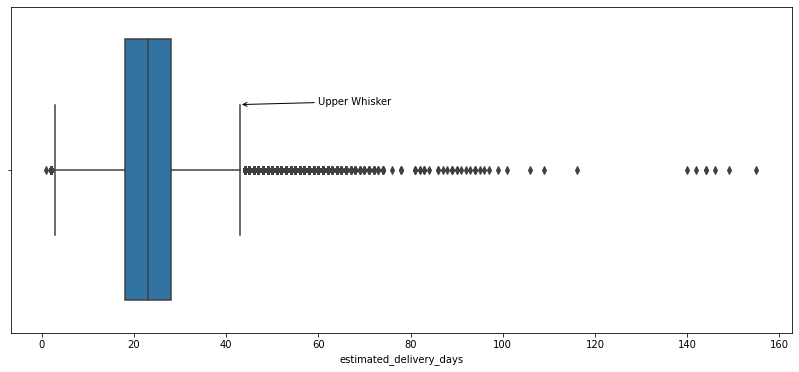

In [36]:
#box-and-whiskers
(fig, ax) = plt.subplots(figsize = (14, 6))
ax = sns.boxplot(x = orders_df['estimated_delivery_days'])
ax.annotate(text = 'Upper Whisker',
            xy = (orders_df['estimated_delivery_days'].quantile(0.75) + 
                  1.5 * (
                          orders_df['estimated_delivery_days']
                          .quantile([0.25, 0.75])
                            .to_frame()
                            .unstack()
                            .unstack()
                            .assign(iqr = lambda df: df[0.75] - df[0.25])
                            ['iqr']
                            ), 
                   -0.2
                  ),
              xytext = (60, -0.2),
              arrowprops = {'arrowstyle':'->'}
           )
plt.show()

In [28]:
(
  orders_df['estimated_delivery_days']
  .quantile([0.25, 0.75])
    .to_frame()
    .unstack()
    .unstack()
    .assign(iqr = lambda df: df[0.75] - df[0.25])
    ['iqr']
)

estimated_delivery_days    10.0
Name: iqr, dtype: float64

In [40]:
(
orders_df
    [(orders_df['delivery_days'].between(29, 209)) & (orders_df['delivery_days'] > orders_df['estimated_delivery_days'])]
    [['order_status', 'order_purchase_timestamp', 'order_delivered_customer_date', 'delivery_days', 'estimated_delivery_days']]
)

,order_status,order_purchase_timestamp,order_delivered_customer_date,delivery_days,estimated_delivery_days
3,delivered,2016-09-15 12:16:00,2016-11-09 07:47:00,54.0,18
54,delivered,2016-10-04 18:07:00,2016-11-29 15:23:00,55.0,54
66,delivered,2016-10-04 21:54:00,2016-12-12 20:31:00,68.0,50
365,delivered,2017-01-07 00:34:00,2017-03-06 13:15:00,58.0,38
375,delivered,2017-01-09 00:37:00,2017-02-24 09:42:00,46.0,45
...,...,...,...,...,...
94516,delivered,2018-08-06 14:32:00,2018-09-19 16:44:00,44.0,10
94581,delivered,2018-08-06 17:19:00,2018-09-12 02:38:00,36.0,21
95474,delivered,2018-08-09 10:00:00,2018-09-10 20:41:00,32.0,13
95708,delivered,2018-08-10 00:17:00,2018-09-12 20:15:00,33.0,17


In [41]:
orders_df_w_errors = orders_df_w_errors.append(
    orders_df
    [(orders_df['delivery_days'].between(29, 209)) & (orders_df['delivery_days'] > orders_df['estimated_delivery_days'])]
    .assign(error_log = 'delivery post estimated delivery')
)
orders_df = orders_df.drop(index =  
                                   orders_df
                                    [(orders_df['delivery_days'].between(29, 209)) 
                                     & (orders_df['delivery_days'] > orders_df['estimated_delivery_days'])].index)

In [42]:
orders_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_days,estimated_delivery_days,days_btw_purch_and_approval,days_btw_approval_and_carrier,days_btw_carrier_and_customer
0,1,1,shipped,2016-09-04 21:15:00,2016-10-07 13:18:00,2016-10-18 13:14:00,NaT,2016-10-20,NaN,45,32.0,10.0,NaN
1,2,2,canceled,2016-09-05 00:15:00,2016-10-07 13:17:00,NaT,NaT,2016-10-28,NaN,52,32.0,NaN,NaN
2,3,3,canceled,2016-09-13 15:24:00,2016-10-07 13:16:00,NaT,NaT,2016-09-30,NaN,16,23.0,NaN,NaN
4,5,5,canceled,2016-10-02 22:07:00,2016-10-06 15:50:00,NaT,NaT,2016-10-25,NaN,22,3.0,NaN,NaN
5,6,6,delivered,2016-10-03 09:44:00,2016-10-06 15:50:00,2016-10-23 14:02:00,2016-10-26 14:02:00,2016-10-27,23.0,23,3.0,16.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,99437,99437,canceled,2018-09-29 09:13:00,NaT,NaT,NaT,2018-10-15,NaN,15,NaN,NaN,NaN
99437,99438,99438,canceled,2018-10-01 15:30:00,NaT,NaT,NaT,2018-10-23,NaN,21,NaN,NaN,NaN
99438,99439,99439,canceled,2018-10-03 18:55:00,NaT,NaT,NaT,2018-10-16,NaN,12,NaN,NaN,NaN
99439,99440,99440,canceled,2018-10-16 20:16:00,NaT,NaT,NaT,2018-11-12,NaN,26,NaN,NaN,NaN


In [43]:
(
orders_df
    .iloc[:,-5:]
    .mean()
    .to_frame()
    .rename(columns = {0:'mean_val'})
    .merge(
           right = orders_df
                    .iloc[:,-5:]
                    .median()
                    .to_frame()
                    .rename(columns = {0:'median_val'})
           , left_index = True 
           , right_index = True
          )
    .merge(
           right = orders_df
                    .iloc[:, -5:]
                    .mode()
                    .stack()
                    .to_frame()
                    .droplevel(0)
                    .rename(columns = {0:'mode_val'})
           , left_index = True
           , right_index = True
          )
# Masuri de dispersie: gama, gama inter-cvartilica, varianta, deviatie standard
    .merge(
           right = orders_df
                    .iloc[:,-5:]
                    .max()
                    .to_frame()
                    .rename(columns = {0:'max_val'})
           , left_index = True 
           , right_index = True
          )
    .merge(
           right = orders_df
                    .iloc[:,-5:]
                    .min()
                    .to_frame()
                    .rename(columns = {0:'min_val'})
           , left_index = True 
           , right_index = True
          )
    .merge( 
           right = orders_df
                    .iloc[:,-5:]
                    .max()
                    .sub(
                         orders_df
                            .iloc[:,-5:]
                            .min()
                            )
                    .to_frame()
                    .rename(columns = {0:'range_val'})
           , left_index = True 
           , right_index = True
          )
    .merge(right = orders_df
                    .iloc[:,-5:]
                    .quantile([0.25, 0.75])
                    .stack() #stivuire/de-pivotare
                    .swaplevel()
                    .unstack() #de-stivuire/pivotare
                    .assign(iqr = lambda df: df[0.75] - df[0.25])
                    .assign(upper_whisker = lambda df: df[0.75] + 1.5*df['iqr'])
          , left_index = True
          , right_index = True)
)

,mean_val,median_val,mode_val,max_val,min_val,range_val,0.25,0.75,iqr,upper_whisker
delivery_days,10.877610,10.0,7.0,70.0,0.0,70.0,6.0,14.0,8.0,26.0
estimated_delivery_days,23.294055,23.0,21.0,155.0,1.0,154.0,18.0,28.0,10.0,43.0
days_btw_purch_and_approval,0.244351,0.0,0.0,187.0,0.0,187.0,0.0,0.0,0.0,0.0
days_btw_approval_and_carrier,2.221817,1.0,0.0,54.0,0.0,54.0,0.0,3.0,3.0,7.5
days_btw_carrier_and_customer,7.780450,7.0,6.0,48.0,0.0,48.0,4.0,11.0,7.0,21.5


In [47]:
(
orders_df
    [orders_df['days_btw_purch_and_approval'] > 0]
    [['order_status', 'order_purchase_timestamp', 'order_approved_at', 'days_btw_purch_and_approval']]
    ['days_btw_purch_and_approval']
    .value_counts()
)

1.0      11411
2.0       2511
3.0       1302
4.0        271
5.0        125
6.0         22
7.0         13
8.0         12
10.0         6
11.0         4
12.0         3
32.0         3
23.0         2
13.0         2
9.0          2
60.0         1
28.0         1
187.0        1
Name: days_btw_purch_and_approval, dtype: int64

In [48]:
orders_df_w_errors = orders_df_w_errors.append(
                                orders_df[orders_df['days_btw_purch_and_approval'] > 5]
                                    .assign(error_log = 'time delta > 5 between purchase and approval')
                                    )
orders_df = orders_df.drop(
                            index = orders_df[orders_df['days_btw_purch_and_approval'] > 5].index
                            )
len(orders_df)

94084

In [53]:
(
orders_df
    .iloc[:,-5:]
    .mean()
    .to_frame()
    .rename(columns = {0:'mean_val'})
    .merge(
           right = orders_df
                    .iloc[:,-5:]
                    .median()
                    .to_frame()
                    .rename(columns = {0:'median_val'})
           , left_index = True 
           , right_index = True
          )
    .merge(
           right = orders_df
                    .iloc[:, -5:]
                    .mode()
                    .stack()
                    .to_frame()
                    .droplevel(0)
                    .rename(columns = {0:'mode_val'})
           , left_index = True
           , right_index = True
          )
# Masuri de dispersie: gama, gama inter-cvartilica, varianta, deviatie standard
    .merge(
           right = orders_df
                    .iloc[:,-5:]
                    .max()
                    .to_frame()
                    .rename(columns = {0:'max_val'})
           , left_index = True 
           , right_index = True
          )
    .merge(
           right = orders_df
                    .iloc[:,-5:]
                    .min()
                    .to_frame()
                    .rename(columns = {0:'min_val'})
           , left_index = True 
           , right_index = True
          )
    .merge( 
           right = orders_df
                    .iloc[:,-5:]
                    .max()
                    .sub(
                         orders_df
                            .iloc[:,-5:]
                            .min()
                            )
                    .to_frame()
                    .rename(columns = {0:'range_val'})
           , left_index = True 
           , right_index = True
          )
    .merge(right = orders_df
                    .iloc[:,-5:]
                    .quantile([0.25, 0.75])
                    .stack() #stivuire/de-pivotare
                    .swaplevel()
                    .unstack() #de-stivuire/pivotare
                    .assign(iqr = lambda df: df[0.75] - df[0.25])
                    .assign(upper_whisker = lambda df: df[0.75] + 1.5*df['iqr'])
          , left_index = True
          , right_index = True)
    .merge(right = orders_df
                    .iloc[:,-5:]
                    .std()
                    .to_frame()
                    .rename(columns={0:'std_val'})
           , left_index = True
           , right_index = True
          )  
)

,mean_val,median_val,mode_val,max_val,min_val,range_val,0.25,0.75,iqr,upper_whisker,std_val
delivery_days,10.872582,10.0,7.0,70.0,0.0,70.0,6.0,14.0,8.0,26.0,6.537265
estimated_delivery_days,23.290347,23.0,21.0,155.0,1.0,154.0,18.0,28.0,10.0,43.0,8.911049
days_btw_purch_and_approval,0.234743,0.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.614432
days_btw_approval_and_carrier,2.221658,1.0,0.0,54.0,0.0,54.0,0.0,3.0,3.0,7.5,3.028337
days_btw_carrier_and_customer,7.780560,7.0,6.0,48.0,0.0,48.0,4.0,11.0,7.0,21.5,5.782698


In [52]:
(
orders_df
    .iloc[:,-5:]
    .std()
    .to_frame()
    .rename(columns={0:'std_val'})
)

,std_val
delivery_days,6.537265
estimated_delivery_days,8.911049
days_btw_purch_and_approval,0.614432
days_btw_approval_and_carrier,3.028337
days_btw_carrier_and_customer,5.782698


## Histograme de frecventa

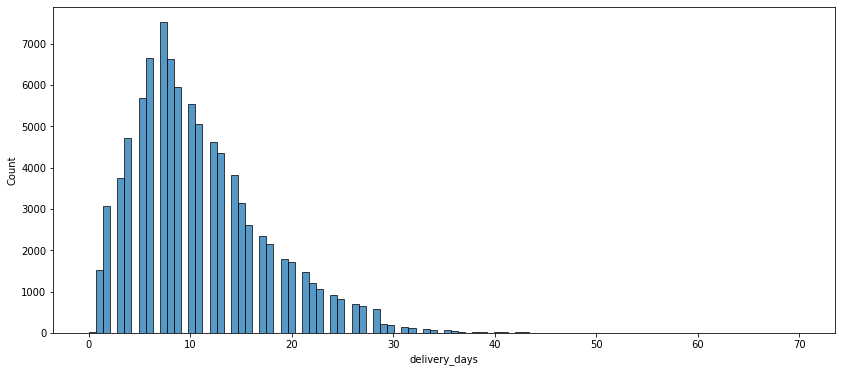

In [54]:
(fig, ax) = plt.subplots(figsize = (14, 6))
ax = sns.histplot(data = orders_df['delivery_days'], kde = False, bins = 100)
#plt.hist(), ax.hist()
plt.show()

In [55]:
pd.cut(x = orders_df['delivery_days'], bins = 100)

4                 NaN
5        (22.4, 23.1]
6        (23.8, 24.5]
7        (34.3, 35.0]
8        (29.4, 30.1]
             ...     
99436             NaN
99437             NaN
99438             NaN
99439             NaN
99440             NaN
Name: delivery_days, Length: 94084, dtype: category
Categories (100, interval[float64, right]): [(-0.07, 0.7] < (0.7, 1.4] < (1.4, 2.1] < (2.1, 2.8] ... (67.2, 67.9] < (67.9, 68.6] < (68.6, 69.3] < (69.3, 70.0]]

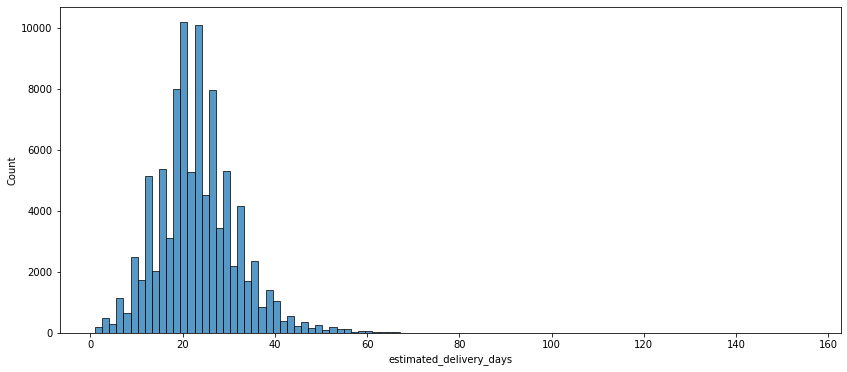

In [56]:
(fig, ax) = plt.subplots(figsize = (14, 6))
ax = sns.histplot(data = orders_df['estimated_delivery_days'], kde = False, bins = 100)
#plt.hist(), ax.hist()
plt.show()

In [57]:
pd.cut(x = orders_df['estimated_delivery_days'], bins = 100)

4        (21.02, 22.56]
5         (22.56, 24.1]
6        (33.34, 34.88]
7        (51.82, 53.36]
8         (54.9, 56.44]
              ...      
99436     (14.86, 16.4]
99437    (19.48, 21.02]
99438    (11.78, 13.32]
99439    (25.64, 27.18]
99440    (11.78, 13.32]
Name: estimated_delivery_days, Length: 94084, dtype: category
Categories (100, interval[float64, right]): [(0.846, 2.54] < (2.54, 4.08] < (4.08, 5.62] < (5.62, 7.16] ... (148.84, 150.38] < (150.38, 151.92] < (151.92, 153.46] < (153.46, 155.0]]

In [58]:
pd.qcut(x = orders_df['estimated_delivery_days'], q = 4)

4         (18.0, 23.0]
5         (18.0, 23.0]
6        (28.0, 155.0]
7        (28.0, 155.0]
8        (28.0, 155.0]
             ...      
99436    (0.999, 18.0]
99437     (18.0, 23.0]
99438    (0.999, 18.0]
99439     (23.0, 28.0]
99440    (0.999, 18.0]
Name: estimated_delivery_days, Length: 94084, dtype: category
Categories (4, interval[float64, right]): [(0.999, 18.0] < (18.0, 23.0] < (23.0, 28.0] < (28.0, 155.0]]

## Curbe de densitate

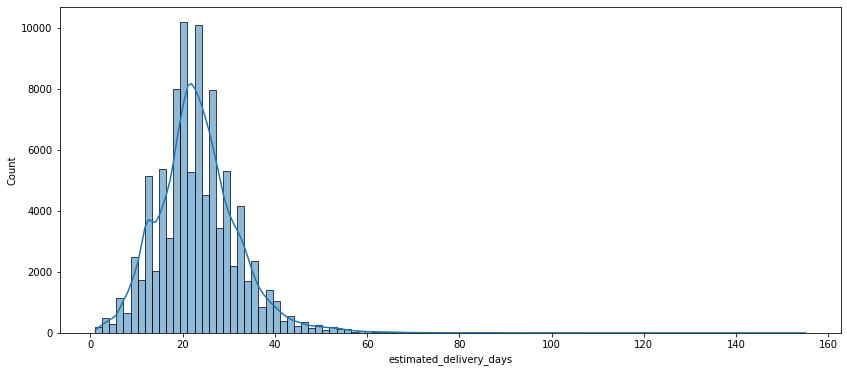

In [59]:
(fig, ax) = plt.subplots(figsize = (14, 6))
ax = sns.histplot(data = orders_df['estimated_delivery_days'], kde = True, bins = 100)
plt.show()

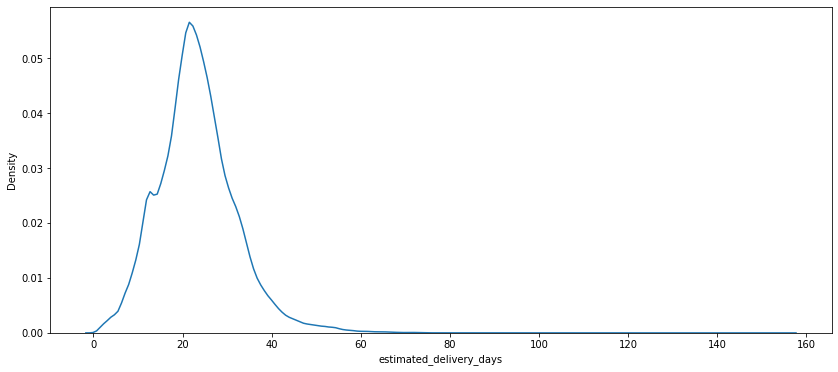

In [61]:
(fig, ax) = plt.subplots(figsize = (14, 6))
ax = sns.kdeplot(data = orders_df['estimated_delivery_days'])
plt.show()

In [62]:
def box_whiskers(data):
    (fig, ax) = plt.subplots(figsize = (14, 6))
    ax = sns.boxplot(x = data)
    plt.show()

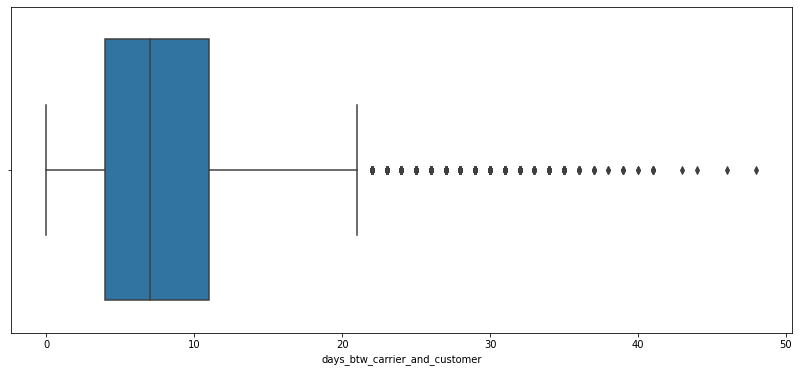

In [63]:
box_whiskers(data = orders_df['days_btw_carrier_and_customer'])

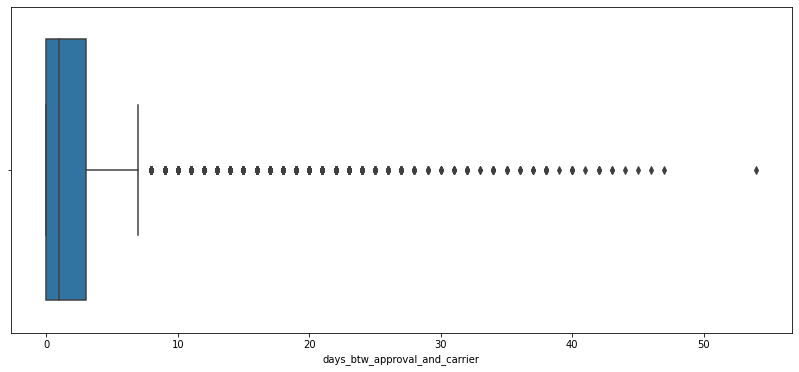

In [64]:
box_whiskers(data = orders_df['days_btw_approval_and_carrier'])

In [65]:
def hist_kde(data, bins):
    (fig, ax) = plt.subplots(figsize = (14, 6))
    ax = sns.histplot(data = data, bins = bins)
    plt.show()

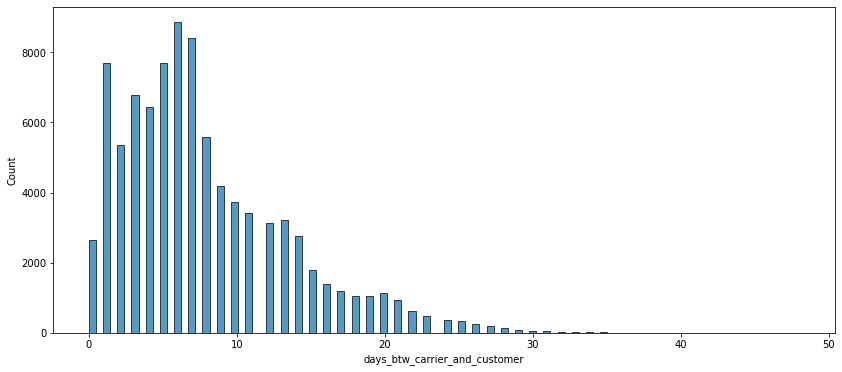

In [66]:
hist_kde(data = orders_df['days_btw_carrier_and_customer'], bins = 100)

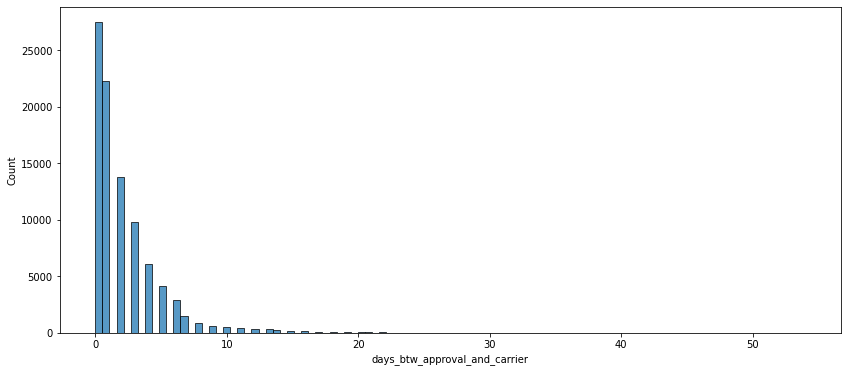

In [67]:
hist_kde(data = orders_df['days_btw_approval_and_carrier'], bins = 100)

## Distributia binomiala

Sa se calculeze probabilitatea ca o comanda sa fie reusita, pe baza statusului comenzii, din fisierul
olist_orders_dataset.csv. Sa se calculeze, apoi, urmatoarele:
- Probabilitatea de a avea 9 comenzi reusite din urmatoarele 10, in contextul in care cunoastem
probabilitatea generala de comenzi reusite.
- Probabilitatea de a avea mai putin de 6 comenzi reusite din urmatoarele 10, in contextul in care
cunoastem probabilitatea generala de comenzi reusite.
- Probabilitatea de a avea mai mult de 8 comenzi reusite din urmatoarele 10, in contextul in care
cunoastem probabilitatea generala de comenzi reusite.


In [68]:
from scipy import stats

In [69]:
orders_df['order_status'].value_counts()

delivered      91144
shipped         1097
canceled         617
unavailable      606
invoiced         314
processing       299
created            5
approved           2
Name: order_status, dtype: int64

In [71]:
p_successful_orders = len(orders_df[orders_df['order_status'] == 'delivered'])/len(orders_df)
p_successful_orders

0.9687513285999745

In [72]:
#exact 9 comenzi din 10
stats.binom.pmf(k = 9, n = 10, p = p_successful_orders)

0.23482393283447173

In [73]:
#<=6 comenzi reusite din 10: P(0/10), P(1/10), ... , P(6/10)
stats.binom.cdf(k = 6, n = 10, p = p_successful_orders) #cdf -> <= val

0.0001720900609804144

In [74]:
#>8 comenzi reusite din 10: P(9/10), P(10/10)
stats.binom.sf(k = 8, n = 10, p = p_successful_orders) #sf -> > val (1 - <= val)

0.9628100734557334

In [75]:
1 - stats.binom.cdf(k = 8, n = 10, p = p_successful_orders)

0.9628100734557334

## Distributia Poisson

Sa se calculeze numarul mediu de comenzi pe zi. Stiind numarul mediu de comenzi pe zi, sa se afle
urmatoarele:
- Probabilitatea de a primi 100 comenzi in orice zi.
- Probabilitatea de a primi mai putin de 100 comenzi in orice zi.
- Probabilitatea de a primi mai mult de 100 comenzi in orice zi

In [77]:
daily_orders_df = (
orders_df
    .set_index('order_purchase_timestamp')
    .resample(rule = 'D')
    .count()
    [['order_id']]
    .rename(columns = {'order_id':'no_orders'})
)

In [79]:
avg_daily_orders = daily_orders_df.mean().iloc[0]
avg_daily_orders

126.11796246648794

In [80]:
#probabilitate de a primi 100 comenzi in orice zi
p_100_orders_per_day = stats.poisson.pmf(k = 100, mu = avg_daily_orders)
p_100_orders_per_day

0.0021644908489423

In [81]:
#probabilitate de a primi <= 100 comenzi in orice zi
p_100_orders_or_less = stats.poisson.cdf(k = 100, mu = avg_daily_orders) #cdf -> suma de pana la nr dorit: P(0/126) + P(1/126) + ... + P(100/126)
p_100_orders_or_less

0.009377661814591437

In [82]:
#probabilitate de a primi > 100 comenzi in orice zi
p_101_orders_or_more = stats.poisson.sf(k = 100, mu = avg_daily_orders) #sf -> suma de peste nr dorit: P(101/126) + ... + (P126/126)
p_101_orders_or_more

0.9906223381854086

In [83]:
items_mean_price = (
order_items_df
    .groupby(by = 'product_id')
    .mean()
    [['price']]
    .rename(columns = {'price':'mean_price'})
)

In [84]:
items_mean_price

,mean_price
product_id,
1,101.65
2,129.90
3,229.00
4,58.90
5,199.00
...,...
32947,114.99
32948,90.00
32949,32.00


In [85]:
mean_price = items_mean_price.mean().iloc[0]
mean_price

145.30246421050177

In [86]:
std_price = items_mean_price.std().iloc[0]
std_price

246.89575585438536

In [87]:
stats.norm.cdf(x = 100, loc = mean_price, scale = std_price)

0.4272074781791678

In [88]:
stats.norm.ppf(q = 0.05, loc = 23.4, scale = 8.83)

8.875942474018494

<AxesSubplot:xlabel='delivery_days', ylabel='Count'>

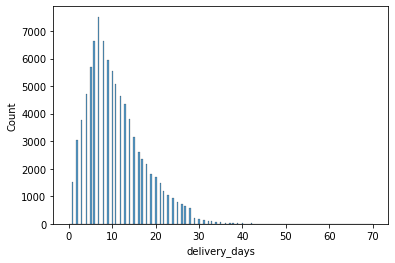

In [89]:
sns.histplot(orders_df['delivery_days'])

## Testare A/B in campanii de marketing

In [90]:
mktg_df = pd.read_csv('C:\\Users\\anlazar\\Full_Archive\\New Files\\marketing.csv')
mktg_df.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,1/1/18,House Ads,personalization,True,English,English,0-18 years,1/1/18,NaN,House Ads,True
1,a100000030,1/1/18,House Ads,personalization,True,English,English,19-24 years,1/1/18,NaN,House Ads,True
2,a100000031,1/1/18,House Ads,personalization,True,English,English,24-30 years,1/1/18,NaN,House Ads,True
3,a100000032,1/1/18,House Ads,personalization,True,English,English,30-36 years,1/1/18,NaN,House Ads,True
4,a100000033,1/1/18,House Ads,personalization,True,English,English,36-45 years,1/1/18,NaN,House Ads,True


In [91]:
mktg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              10037 non-null  object
 1   date_served          10021 non-null  object
 2   marketing_channel    10022 non-null  object
 3   variant              10037 non-null  object
 4   converted            10022 non-null  object
 5   language_displayed   10037 non-null  object
 6   language_preferred   10037 non-null  object
 7   age_group            10037 non-null  object
 8   date_subscribed      1856 non-null   object
 9   date_canceled        577 non-null    object
 10  subscribing_channel  1856 non-null   object
 11  is_retained          1856 non-null   object
dtypes: object(12)
memory usage: 941.1+ KB


In [92]:
for column in ['converted', 'is_retained']:
    mktg_df[column] = mktg_df[column].astype('bool')

In [93]:
mktg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              10037 non-null  object
 1   date_served          10021 non-null  object
 2   marketing_channel    10022 non-null  object
 3   variant              10037 non-null  object
 4   converted            10037 non-null  bool  
 5   language_displayed   10037 non-null  object
 6   language_preferred   10037 non-null  object
 7   age_group            10037 non-null  object
 8   date_subscribed      1856 non-null   object
 9   date_canceled        577 non-null    object
 10  subscribing_channel  1856 non-null   object
 11  is_retained          10037 non-null  bool  
dtypes: bool(2), object(10)
memory usage: 803.9+ KB


In [94]:
mktg_df['marketing_channel'].value_counts()

House Ads    4733
Instagram    1871
Facebook     1860
Push          993
Email         565
Name: marketing_channel, dtype: int64

In [96]:
mktg_df[mktg_df['marketing_channel'] == 'Email']['variant'].value_counts()

personalization    291
control            274
Name: variant, dtype: int64

In [97]:
email_mktg_df = mktg_df[mktg_df['marketing_channel'] == 'Email']

In [99]:
subscribers = (
email_mktg_df
    .groupby(by = ['user_id', 'variant'])
    [['converted']]
    .max()   
)
subscribers

,,converted
user_id,variant,
a100000526,personalization,True
a100000530,personalization,True
a100000534,personalization,False
a100000538,personalization,True
a100000542,personalization,True
...,...,...
a100007288,control,True
a100007289,control,True
a100007290,control,True


In [101]:
(
subscribers
.unstack(level = 1)
)

converted                
variant      control personalization
user_id                             
a100000526       NaN            True
a100000530       NaN            True
a100000534       NaN           False
a100000538       NaN            True
a100000542       NaN            True
...              ...             ...
a100007288      True             NaN
a100007289      True             NaN
a100007290      True             NaN
a100007291      True             NaN
a100007293      True             NaN

[553 rows x 2 columns]

In [127]:
control = (
subscribers
    .unstack(level = 1)
    [('converted', 'control')]
    .dropna()
)

In [129]:
control

user_id
a100000687    False
a100000688     True
a100000689     True
a100000690     True
a100000691     True
              ...  
a100007288     True
a100007289     True
a100007290     True
a100007291     True
a100007293     True
Name: (converted, control), Length: 270, dtype: object

In [126]:
personalization = (
    subscribers
    .unstack(level = 1)
    [('converted', 'personalization')]
    .dropna()
)
personalization

user_id
a100000526     True
a100000530     True
a100000534    False
a100000538     True
a100000542     True
              ...  
a100007273     True
a100007274     True
a100007275     True
a100007276     True
a100007277     True
Name: (converted, personalization), Length: 284, dtype: object

In [113]:
print(f"Control conversion rate: {control.mean()}")
print(f"Personalization conversion rate: {personalization.mean()}")

Control conversion rate: 0.2814814814814815
Personalization conversion rate: 0.3908450704225352


In [114]:
def lift(control, personalization):
    control_mean = control.mean()
    personalization_mean = personalization.mean()
    lift = (personalization_mean - control_mean)/control_mean
    return str(round(100*lift, 2)) + '%'

In [115]:
print(lift(control = control, personalization = personalization))

38.85%


In [128]:
stats.ttest_ind(control, personalization)

Ttest_indResult(statistic=-2.7343299447505074, pvalue=0.0064514878446941745)

In [133]:
#Define Control & Personalization Groups
control = (
subscribers
    .unstack(level = 1)
    [('converted', 'control')]
    .dropna()
)

personalization = (
    subscribers
    .unstack(level = 1)
    [('converted', 'personalization')]
    .dropna()
)

#Calculate conversion rate
print(f"Control conversion rate: {control.mean()}")
print(f"Personalization conversion rate: {personalization.mean()}")

#Define func to calculate lift
def lift(control, personalization):
    control_mean = control.mean()
    personalization_mean = personalization.mean()
    lift = (personalization_mean - control_mean)/control_mean
    return str(round(100*lift, 2)) + '%'

print(f"Calculated lift: {lift(control = control, personalization = personalization)}")
print(stats.ttest_ind(control, personalization))

Control conversion rate: 0.2814814814814815
Personalization conversion rate: 0.3908450704225352
Calculated lift: 38.85%
Ttest_indResult(statistic=-2.7343299447505074, pvalue=0.0064514878446941745)


In [134]:
0.006 < 0.05

True

In [137]:
def ab_segmentation(segment):
    for subsegment in mktg_df[segment].unique():
        print(subsegment)
        email_mktg_df = mktg_df[(mktg_df['marketing_channel'] == 'Email') & (mktg_df[segment] == subsegment)]
        subscribers_df = (email_mktg_df
                              .groupby(by = ['user_id', 'variant'])
                              ['converted']
                               .max()
                               .unstack(level = 1)
                         )
        control_ser = subscribers_df['control'].dropna()
        personalization_ser = subscribers_df['personalization'].dropna()
        print(f'lift: {lift(control_ser, personalization_ser)}')
        print(f't-test results: {stats.ttest_ind(control_ser, personalization_ser)}', '\n\n')

In [138]:
ab_segmentation('language_displayed')

English
lift: 39.0%
t-test results: Ttest_indResult(statistic=-2.2183598646203166, pvalue=0.026991701290720815) 


German
lift: -1.62%
t-test results: Ttest_indResult(statistic=0.1910083418078718, pvalue=0.8494394170062678) 


Arabic
lift: 50.0%
t-test results: Ttest_indResult(statistic=-0.5773502691896255, pvalue=0.5795840000000001) 


Spanish
lift: 166.67%
t-test results: Ttest_indResult(statistic=-2.3570226039551585, pvalue=0.040156718110477524) 




In [139]:
ab_segmentation('language_preferred')

English
lift: 37.09%
t-test results: Ttest_indResult(statistic=-2.1368778644306876, pvalue=0.03310554929357251) 


German
lift: -1.62%
t-test results: Ttest_indResult(statistic=0.1910083418078718, pvalue=0.8494394170062678) 


Arabic
lift: 50.0%
t-test results: Ttest_indResult(statistic=-0.5773502691896255, pvalue=0.5795840000000001) 


Spanish
lift: 250.0%
t-test results: Ttest_indResult(statistic=-2.860387767736777, pvalue=0.018768522060029717) 




In [140]:
ab_segmentation('age_group')

0-18 years
lift: 121.4%
t-test results: Ttest_indResult(statistic=-2.966044912142211, pvalue=0.0038724494391297226) 


19-24 years
lift: 106.24%
t-test results: Ttest_indResult(statistic=-3.03179438478667, pvalue=0.0030623836114689134) 


24-30 years
lift: 161.19%
t-test results: Ttest_indResult(statistic=-3.861539544326876, pvalue=0.00018743381094867335) 


30-36 years
lift: -100.0%
t-test results: Ttest_indResult(statistic=3.1859064644147996, pvalue=0.0023238487431765137) 


36-45 years
lift: -85.23%
t-test results: Ttest_indResult(statistic=2.4317901279318503, pvalue=0.017975686009788286) 


45-55 years
lift: -72.22%
t-test results: Ttest_indResult(statistic=2.065499127317933, pvalue=0.043062339688201196) 


55+ years
lift: -100.0%
t-test results: Ttest_indResult(statistic=3.3265654564203397, pvalue=0.0016358623456360435) 




## Regresie si corelatie

In [142]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  int64  
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 2.3+ MB


In [145]:
#pret livrare vs greutate comanda
orders_cost_weight = (
    products_df[['product_id', 'product_weight_g']]
    .merge(right = order_items_df[['order_id', 'product_id', 'price', 'freight_value']])
    .merge(right = orders_df[['order_id']])
    .groupby(by = 'order_id')
    .sum()
    [['price', 'freight_value', 'product_weight_g']]
    .assign(total_cost = lambda df: df['price'] + df['freight_value'])
    [['total_cost', 'product_weight_g']]
    .rename(columns = {'product_weight_g':'total_weight'})
)

In [146]:
orders_cost_weight

,total_cost,total_weight
order_id,,
5,109.34,500.0
6,45.46,300.0
7,39.09,400.0
8,35.61,476.0
9,53.73,767.0
...,...,...
99412,510.96,27100.0
99413,61.29,1614.0
99414,33.23,450.0


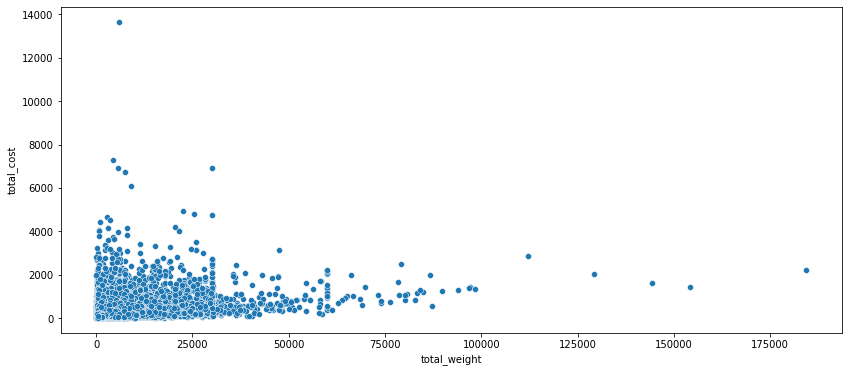

In [147]:
(fig, ax) = plt.subplots(figsize = (14, 6))
ax = sns.scatterplot(
                     x = orders_cost_weight['total_weight'], 
                     y = orders_cost_weight['total_cost']
                    )
plt.show()

In [162]:
orders_cost_weight['total_cost'].mean()

159.59010105448155

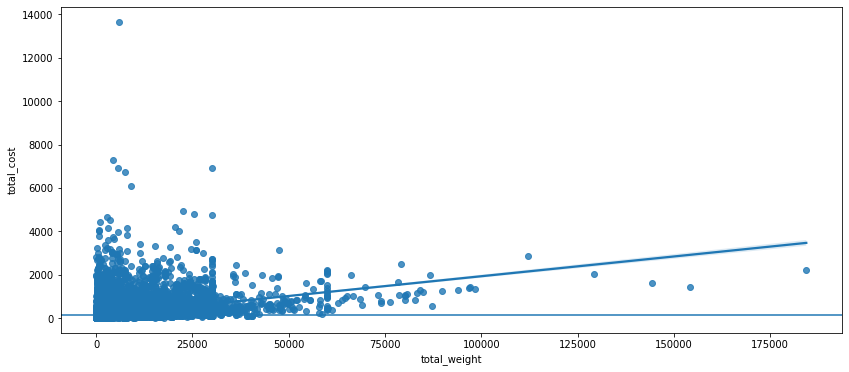

In [161]:
(fig, ax) = plt.subplots(figsize = (14, 6))
ax = sns.regplot(
                     x = orders_cost_weight['total_weight'], 
                     y = orders_cost_weight['total_cost']                
                    )
ax.axhline(orders_cost_weight['total_cost'].mean())
plt.show()

In [151]:
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress( x = orders_cost_weight['total_weight'], 
                                                               y = orders_cost_weight['total_cost'] 
                                                                )

In [152]:
slope

0.018197116262817333

In [153]:
intercept

116.33983723452872

In [154]:
r = stats.pearsonr(x = orders_cost_weight['total_weight'],
                   y = orders_cost_weight['total_cost']
                   )

In [156]:
r[0]

0.3922810556867709

In [157]:
rvalue

0.39228105568677

In [158]:
orders_cost_weight['cost_prediction'] = slope * orders_cost_weight['total_weight'] + intercept
orders_cost_weight['residuals'] = orders_cost_weight['total_cost'] - orders_cost_weight['cost_prediction']

In [159]:
orders_cost_weight['residuals']

order_id
5        -16.098395
6        -76.338972
7        -84.528684
8        -89.391665
9        -76.567025
            ...    
99412    -98.521688
99413    -84.419983
99414    -91.298540
99415    -30.778540
99422   -139.129846
Name: residuals, Length: 93316, dtype: float64

In [163]:
r[0]**2

0.15388442665072746

In [164]:
rmse = (
            (
                (
                    orders_cost_weight['cost_prediction'] - orders_cost_weight['total_cost']
                 )**2
            ).mean()
        )**0.5

202.42326300345405